In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import riskkit as erk
import scipy.stats as stats

In [79]:
rets = erk.get_ffme_allreturns()[['Lo 20', 'Hi 20']]
rets

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316
...,...,...
2018-08,0.0309,0.0249
2018-09,-0.0204,0.0019
2018-10,-0.1052,-0.0741
2018-11,-0.0278,0.0249


In [80]:
r = rets['Lo 20']

In [81]:
np.round(((1+r).prod() ** (12/r.shape[0]) - 1) * 100, 2)

15.2

In [82]:
np.round(r.std() * 12**.5 * 100, 1)

33.7

In [83]:
r = rets['Hi 20']

In [84]:
np.round(((1+r).prod() ** (12/r.shape[0]) - 1) * 100, 2)

9.85

In [85]:
np.round(r.std() * 12**.5 * 100, 2)

19.51

In [86]:
r = rets['Lo 20']['1999':'2015']

In [87]:
np.round(((1+r).prod() ** (12/r.shape[0]) - 1) * 100, 2)

11.44

In [88]:
np.round(r.std() * 12**.5 * 100, 2)

22.89

In [90]:
r = rets['Hi 20']['1999':'2015']

In [91]:
np.round(((1+r).prod() ** (12/r.shape[0]) - 1) * 100, 2)

6.29

In [92]:
np.round(r.std() * 12**.5 * 100, 2)

17.27

Max Drawdown of 62.48% in 2009-02


<AxesSubplot:>

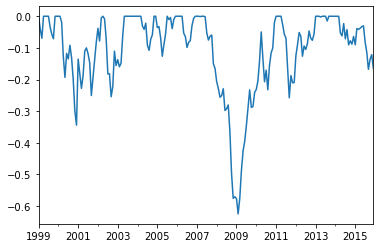

In [93]:
r = rets['Lo 20']['1999':'2015']
dd = erk.drawdown(r)['Drawdown']
print('Max Drawdown of {:.2f}% in {}'.format(-dd.min() * 100, dd.idxmin()))
dd.plot()

Max Drawdown of 55.27% in 2009-02


<AxesSubplot:>

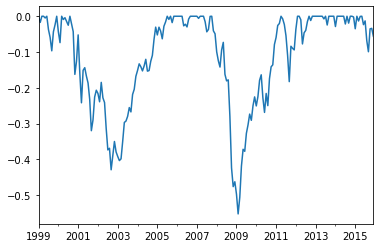

In [94]:
r = rets['Hi 20']['1999':'2015']
dd = erk.drawdown(r)['Drawdown']
print('Max Drawdown of {:.2f}% in {}'.format(-dd.min() * 100, dd.idxmin()))
dd.plot()

In [95]:
hfi = erk.get_hfi_returns()
r = hfi['2009':]
sdevs = erk.semi_deviation(r) * 100
sdevs.sort_values(ascending=False)

Short Selling             2.124006
Emerging Markets          1.527598
Long/Short Equity         1.213857
CTA Global                1.099578
Event Driven              1.013464
Distressed Securities     0.949845
Funds Of Funds            0.794842
Convertible Arbitrage     0.668103
Relative Value            0.571123
Equity Market Neutral     0.518610
Global Macro              0.507508
Merger Arbitrage          0.361121
Fixed Income Arbitrage    0.332054
dtype: float64

In [76]:
erk.skewness(r).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [78]:
erk.kurtosis(r).sort_values(ascending=False)

Convertible Arbitrage     6.775731
Fixed Income Arbitrage    6.406941
Equity Market Neutral     5.071677
Relative Value            4.512482
Emerging Markets          4.401636
Short Selling             4.175832
Long/Short Equity         4.115713
Funds Of Funds            3.816132
Event Driven              3.620617
Distressed Securities     3.319725
Global Macro              3.164362
Merger Arbitrage          2.715238
CTA Global                2.591087
dtype: float64